<a href="https://colab.research.google.com/github/fbertran/m2csmi_s1/blob/master/TD1_withD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openturns

     |████████████████████████████████| 33.7MB 90.9MB/s 


In [0]:
from __future__ import print_function

import openturns as ot

In [3]:
# dimension
dim = 3

# Analytical model definition:
limitState = ot.SymbolicFunction(['R', 'F', 'D'], ['R-F/(pi_*D^2/4)'])

# Test of the limit state function:
x = [300., 75000., 20.]
print('x=', x)
print('G(x)=', limitState(x))

x= [300.0, 75000.0, 20.0]
G(x)= [61.2676]


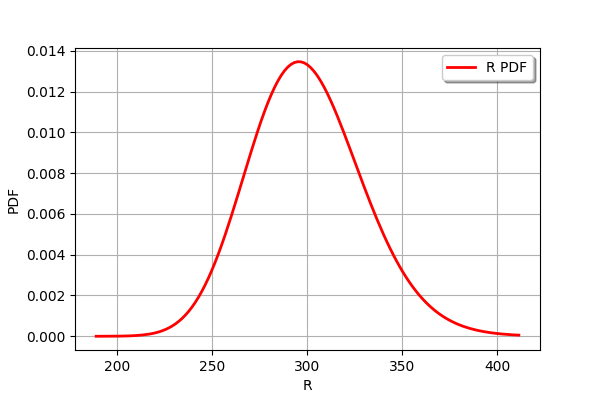

In [4]:
# Stochastic model definition

# Create a first marginal : LogNormal distribution 1D, parameterized by
# its mean and standard deviation
R_dist = ot.LogNormalMuSigma(300.0, 30.0, 0.0).getDistribution()
R_dist.setName('Yield strength')
R_dist.setDescription('R')
# Graphical output of the PDF
R_dist.drawPDF()

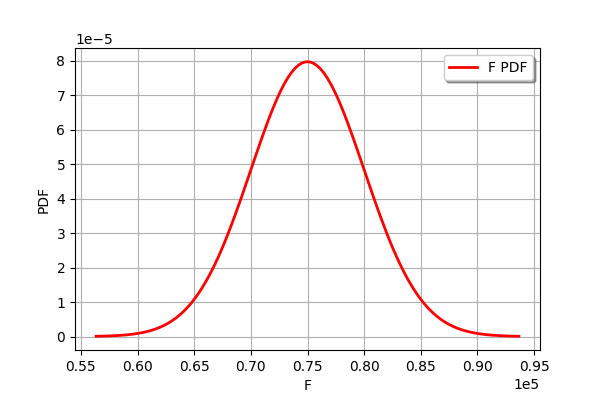

In [5]:
# Create a second marginal : Normal distribution 1D
F_dist = ot.Normal(75000., 5000.)
F_dist.setName('Traction_load')
F_dist.setDescription('F')
# Graphical output of the PDF
F_dist.drawPDF()

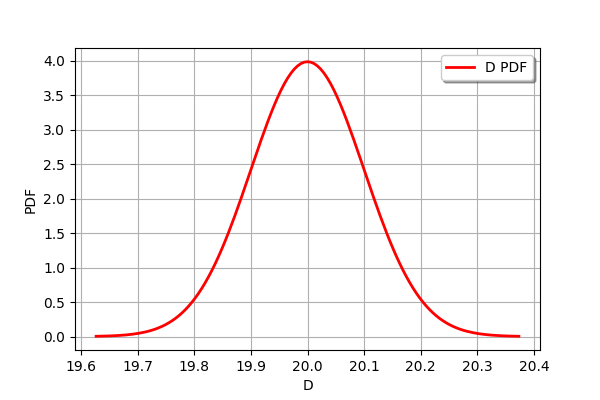

In [7]:
# Create a second marginal : Normal distribution 1D
D_dist = ot.Normal(20., .1)
D_dist.setName('Diameter')
D_dist.setDescription('D')
# Graphical output of the PDF
D_dist.drawPDF()

In [0]:
# Create a copula : IndependentCopula (no correlation)
aCopula = ot.IndependentCopula(dim)
aCopula.setName('Independent copula')

# Instanciate one distribution object
myDistribution = ot.ComposedDistribution([R_dist, F_dist, D_dist], aCopula)
myDistribution.setName('myDist')

# We create a 'usual' RandomVector from the Distribution
vect = ot.RandomVector(myDistribution)


In [0]:
# We create a composite random vector
G = ot.RandomVector(limitState, vect)

# We create an Event from this RandomVector
myEvent = ot.Event(G, ot.Less(), 0.0)

In [0]:
# Using Monte Carlo simulations
cv = 0.005
NbSim = 10000000

experiment = ot.MonteCarloExperiment()
algoMC = ot.ProbabilitySimulationAlgorithm(myEvent, experiment)
# Settings for the MonteCarlo simulation
algoMC.setMaximumOuterSampling(NbSim)
algoMC.setBlockSize(1)
algoMC.setMaximumCoefficientOfVariation(cv)
# For statistics about the algorithm
initialNumberOfCall = limitState.getEvaluationCallsNumber()

# Perform the analysis:
algoMC.run()

MonteCarlo result= probabilityEstimate=2.953170e-02 varianceEstimate=2.180288e-08 standard deviation=1.48e-04 coefficient of variation=5.00e-03 confidenceLength(0.95)=5.79e-04 outerSampling=1314486 blockSize=1
Number of executed iterations = 1314486
Number of calls to the limit state = 1314486
Pf =  0.029531695278610902
CV = 0.0049999827525432925


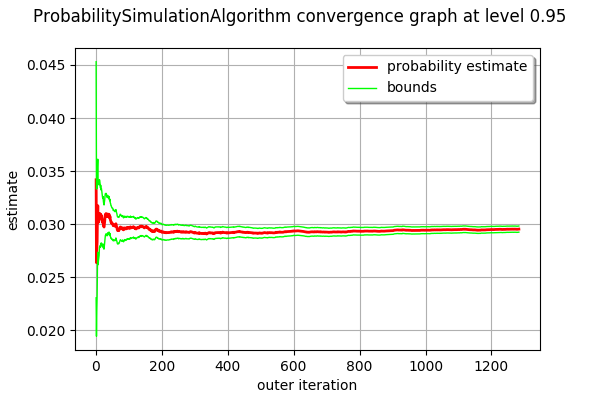

In [17]:
# Results:
result = algoMC.getResult()
probability = result.getProbabilityEstimate()
print('MonteCarlo result=', result)
print('Number of executed iterations =', result.getOuterSampling())
print('Number of calls to the limit state =', limitState.getEvaluationCallsNumber() - initialNumberOfCall)
print('Pf = ', probability)
print('CV =', result.getCoefficientOfVariation())
algoMC.drawProbabilityConvergence()